

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [119]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [120]:
import thinkstats2
import thinkplot

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

##### This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the Tech workplace. 

In [122]:
df = pd.read_csv('/Users/siddharthabhaumik/Downloads/tech_wkpl_survey.csv')

In [123]:
df.head(3)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

##### A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question

#### Variables I find useful are listed below:
1. Age
2. Gender
3. family_history
4. treatment
5. benefits
6. wellness_program
7. seek_help

#### Observation on the Dataset:
1. Only considering survey results from United States as its the majority.
2. Noticed some negative numbers under 'Age' column which I will filter out.
3. Under 'Gender' column, I see lot of variation and spelling error like Male,Mail,maile, M, Cis Male, Female, Cis Female, etc.    I will make it consistent as Male, Female, Other.  
4. Dropped some columns like State, No of Employee, self_employed, etc. as I don't think they add much value.  

##### Basically I am looking for how many people suffering from mental problems opted for 'Treatment'. 
##### Mental health is often overlooked which many times leads up to serious health issues. So, I believe early detection is the key to tackle this.
##### Workplaces which promotes mental health and support their employees through different benefitsand wellness programs will see more people opting for treatments and other kind of help if needed.

In [125]:
# Only considering US population since the majority of the survey result is from US.
df = df[df['Country'] == 'United States']
df['Country'].value_counts()

United States    751
Name: Country, dtype: int64

In [126]:
# Drop columns which doesnt add much value
df.drop(['Timestamp', 'Country','state','self_employed','no_employees','anonymity','leave','obs_consequence','comments','mental_health_interview','phys_health_interview'], axis=1, inplace=True)

In [127]:
df.head(3)

,Age,Gender,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_vs_physical
0,37,Female,No,Yes,Often,No,Yes,Yes,Not sure,No,Yes,No,No,Some of them,Yes,Yes
1,44,M,No,No,Rarely,No,No,Don't know,No,Don't know,Don't know,Maybe,No,No,No,Don't know
4,31,Male,No,No,Never,Yes,Yes,Yes,No,Don't know,Don't know,No,No,Some of them,Yes,Don't know


In [128]:
# Standardizing the Gender data

df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

Male      562
Female    180
Other       9
Name: Gender, dtype: int64

##### Describe what the 5 variables mean in the dataset (Chapter 1).

1. Age: Person's Age
2. Gender: Person's Gender
3. family_history: Do you have a family history of mental illness?
4. treatment: Have you sought treatment for a mental health condition?
5. benefits: Does your employer provide mental health benefits?
6. wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
7. seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

##### Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

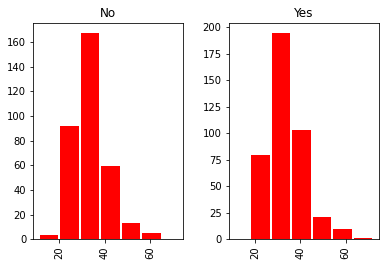

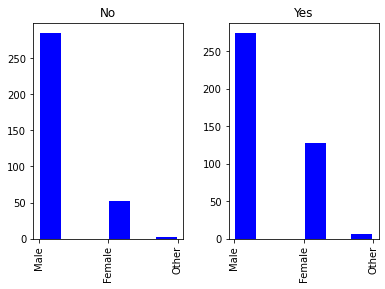

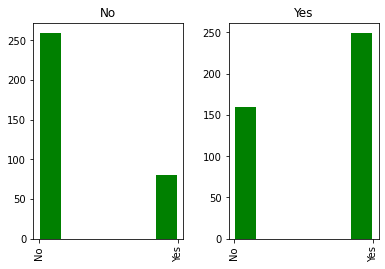

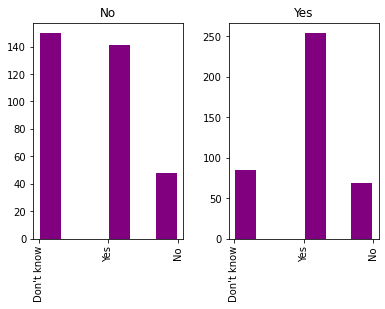

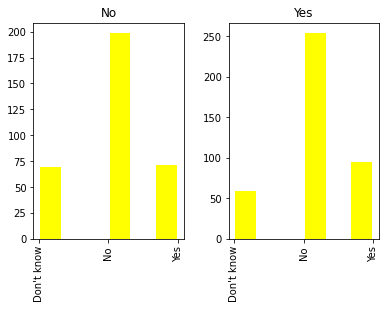

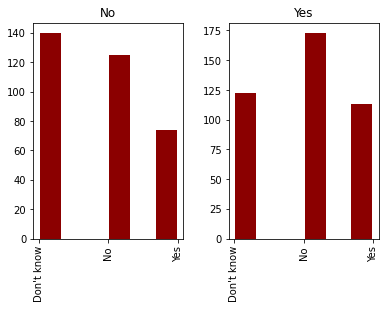

In [129]:
df2 = df[(df['Age'] > 10) & (df['Age'] <= 80)]

df2.hist(column='Age', by='treatment', bins=6, grid=False, rwidth=.9,
      color='red', sharex=True)

df2.hist(column='Gender', by='treatment', bins=6, grid=False, rwidth=.9,
      color='blue', sharex=True)

df2.hist(column='family_history', by='treatment', bins=6, grid=False, rwidth=.9,
      color='green', sharex=True)


df2.hist(column='benefits', by='treatment', bins=6, grid=False, rwidth=.9,
      color='purple', sharex=True)


df2.hist(column='wellness_program', by='treatment', bins=6, grid=False, rwidth=.9,
      color='yellow', sharex=True)

df2.hist(column='seek_help', by='treatment', bins=6, grid=False, rwidth=.9,
      color='darkred', sharex=True)

##### Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [130]:
df_new = df[['Age', 'Gender','family_history','treatment','benefits','wellness_program','seek_help']]
round(df_new.describe(include='all'),2)

,Age,Gender,family_history,treatment,benefits,wellness_program,seek_help
count,751.00,751,751,751,751,751,751
unique,NaN,3,2,2,3,3,3
top,NaN,Male,No,Yes,Yes,No,No
freq,NaN,562,421,410,398,455,300
mean,33.33,NaN,NaN,NaN,NaN,NaN,NaN
std,13.53,NaN,NaN,NaN,NaN,NaN,NaN
min,-29.00,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.50,NaN,NaN,NaN,NaN,NaN,NaN
50%,32.00,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.50,NaN,NaN,NaN,NaN,NaN,NaN


##### Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

In [131]:
# People with Family History of Mental health issues
df_fmly_y = df[df['family_history'] == 'Yes']

df_fmly_y['family_history'].value_counts()

Yes    330
Name: family_history, dtype: int64

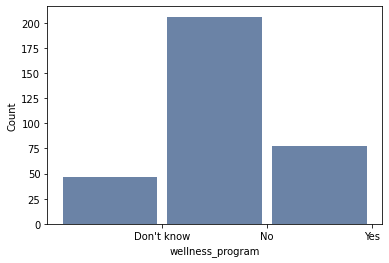

In [133]:

hist_y = thinkstats2.Hist(df_fmly_y.wellness_program, label="With Family Hist")
thinkplot.Hist(hist_y)
thinkplot.Config(xlabel="wellness_program", ylabel="Count")

In [134]:
# To normalize the distribution, we could divide through by the total count:
n_y = hist_y.Total()
pmf_y = hist_y.Copy()
for x, freq in hist_y.Items():
    pmf_y[x] = freq / n_y

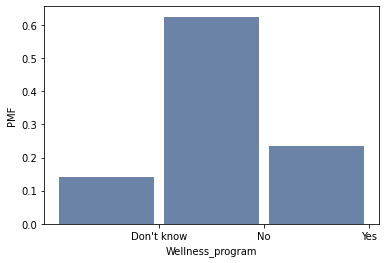

In [135]:
# The result is a Probability Mass Function (PMF).
thinkplot.Hist(pmf_y)
thinkplot.Config(xlabel="Wellness_program", ylabel="PMF")

In [136]:
# People with no Family History of Mental health issues
df_fmly_n = df[df['family_history'] == 'No']

df_fmly_n['family_history'].value_counts()

No    421
Name: family_history, dtype: int64

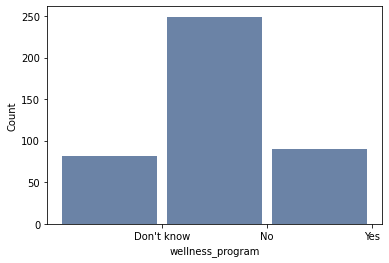

In [137]:

hist_n = thinkstats2.Hist(df_fmly_n.wellness_program, label="No Family Hist")
thinkplot.Hist(hist_n)
thinkplot.Config(xlabel="wellness_program", ylabel="Count")

In [138]:
# To normalize the distribution, we could divide through by the total count:
n_n = hist_n.Total()
pmf_n = hist_n.Copy()
for x, freq in hist_n.Items():
    pmf_n[x] = freq / n_n

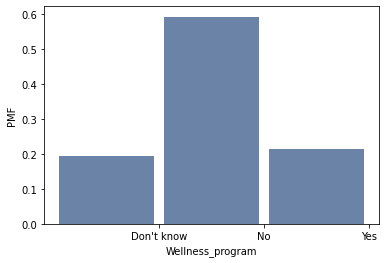

In [139]:
# The result is a Probability Mass Function (PMF).
thinkplot.Hist(pmf_n)
thinkplot.Config(xlabel="Wellness_program", ylabel="PMF")

##### Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

In [140]:
# replacing seek_help string values with numeric
df["seek_help"].replace(['No'], 1, inplace=True)
df["seek_help"].replace(['Yes'], 2, inplace=True)
df["seek_help"].replace(['Don\'t know'], 3, inplace=True)

df['seek_help'].value_counts()

1    300
3    262
2    189
Name: seek_help, dtype: int64

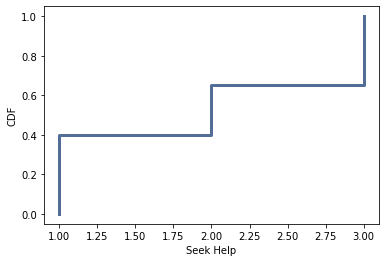

In [141]:
cdf = thinkstats2.Cdf(df.seek_help, label='seek_help')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Seek Help', ylabel='CDF', loc='upper left')

##### Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

Selected Dataset doesn't have right variables to run analytical distribution.

##### Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

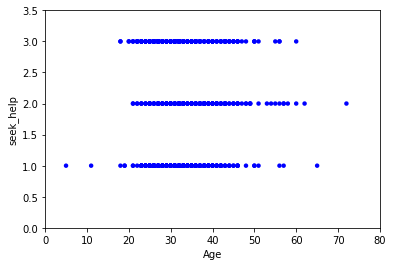

In [142]:
# Scatter Plot#1

thinkplot.Scatter(df.Age, df.seek_help, alpha=1, s = 20)
thinkplot.Config(xlabel='Age',
                 ylabel='seek_help',
                 axis=[0, 80, 0, 3.5],
                 legend=False)

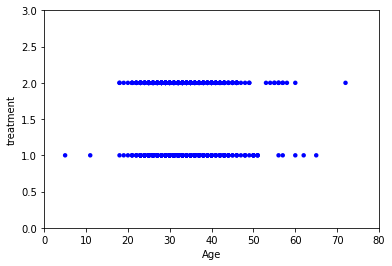

In [143]:
# Scatter Plot#2

df["treatment"].replace(['No'], 1, inplace=True)
df["treatment"].replace(['Yes'], 2, inplace=True)
thinkplot.Scatter(df.Age, df.treatment, alpha=1, s = 20)
thinkplot.Config(xlabel='Age',
                 ylabel='treatment',
                 axis=[0, 80, 0, 3],
                 legend=False)

In [144]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [145]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [146]:
import pandas as pd

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [147]:
# Covariance of Age and Seek_help
Cov(df.Age, df.seek_help)

-0.2909480656949194

In [148]:
# Correlation of Age and Seek_help
SpearmanCorr(df.Age, df.seek_help)

-0.006661938010855149

In [149]:
# Covariance of Age and Treatment
Cov(df.Age, df.treatment)

0.3517351919588795

In [150]:
# Correlation of Age and Treatment
SpearmanCorr(df.Age, df.treatment)

0.03868816034328727

There is a decent correlation between Age and treatment but no correlation between Age and seeking help.

##### Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [151]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [152]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [153]:
df["family_history"].replace(['No'], 1, inplace=True)
df["family_history"].replace(['Yes'], 2, inplace=True)

In [154]:
data = df.family_history.values,df.treatment.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

##### For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [155]:
# The following function computes the intercept and slope of the least squares fit.

from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [156]:
family_hist = df.family_history
med_help = df.treatment

In [157]:
inter, slope = LeastSquares(family_hist, med_help)
inter, slope

(1.0025192543007262, 0.37752825163751597)

In [158]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [159]:
fit_xs, fit_ys = FitLine(family_hist, inter, slope)

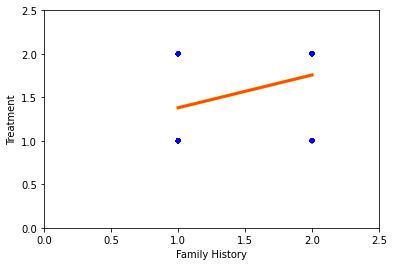

In [166]:
thinkplot.Scatter(family_hist, med_help, color='blue', alpha=1, s=20)
thinkplot.Plot(fit_xs, fit_ys, color='yellow', linewidth=4)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=3)
thinkplot.Config(xlabel="Family History",
                 ylabel='Treatment',
                 axis=[0, 2.5, 0, 2.5],
                 legend=False)